# Symbols in Engineering Drawings

In this tutorial, we will use Random Forest Classifier to build a model that can learn the class of symbols of engineering diagrams.  These symbols appear in engineering diagrams that are called Piping and Instrumentation Diagrams (P & ID), and they are very common in the Oil and Gas industry.  You may want to see our [VIDEO Demo](https://youtu.be/8e1n7mIvACw) on processing and analysing these P&IDs using advance Deep Learning methods! Or refer to our papers if you are interested in knowing more about this problem: 

- E. Elyan, L Jamieson, A. A. Gombe, “Deep learning for symbols detection and classification in engineering drawings”, Neural Networks, 129:91-102, 2020, Elsevier, [DOI 10.1016/j.neunet.2020.05.025](https://doi.org/10.1016/j.neunet.2020.05.025)
- E. Elyan, C.G. Moreno and P. Johnston, “Symbols in Engineering Drawings (SiED): An Imbalanced Dataset Benchmarked by Convolutional Neural Networks”, In 2020 International Joint Conference of the 21st EANN (Engineering Applications of Neural Networks), EANN 2020. Proceedings of the International Neural Networks Society, vol 2. Springer, Cham, [DOI 10.1007/978-3-030-48791-1_16](https://doi.org/10.1007/978-3-030-48791-1_16)

- E. Elyan,C.G. Moreno and C. Jayne, “Symbols classification in engineering drawings”, 2018 International Joint Conference on Neural Networks (IJCNN), Rio de Janeiro, Brazil, 2018, pp. 1-8. [DOI 10.1109/IJCNN.2018.8489087](http://dx.doi.org/10.1109/IJCNN.2018.8489087)

In this tutorial we will focus on classification of symbols, more specifically:

* You will learn how to load, view and classify instances representing 2D images 
* Create and evaluate A Random Forest Model Classifier (Bagging ensemble-based method) using `sklearn.ensemble.RandomForestClassifie` library 
* Make predictions and visualise the results 

***Note*** If you are trying to predict a continous value (e.g. regression problem), then you can use `sklearn.ensemble.RandomForestRegressor`

## Loading Data

Our data is stored in a ***Symbols_pixel.csv*** file. Each record in the file is 10001 features-wide (number of columns) representing one image of size $100\times100$ pixels and the label of the symbol. 


In [2]:
# import libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
# read the file 
df = pd.read_csv('../data/Symbols_pixel.csv',header=None)

## Quick Exploratory Data Analysis (EDA)

Lets do a quick data exploration, this will include finding the size of the dataset, showing few records, and also show the columns names in the data –if any-!


In [3]:
# dataset size 
print(f'df has {df.shape[0]} rows, and {df.shape[1]} columns')

df has 2432 rows, and 10001 columns


* Lets show the first five rows of our dataset, first 5 columns and the last column. We will do this using **pandas** slicing by indexing


In [4]:

df.iloc[:5, list(range(5)) + [-1]]


,0,1,2,3,4,10000
0,0,0,0,0,0,Arrowhead
1,255,255,255,255,255,Arrowhead
2,255,255,255,255,255,Arrowhead
3,255,255,255,255,255,Arrowhead
4,255,255,255,255,255,Arrowhead


### Features Names

As you can see above, our data has no headers. In fact, we don't need columns headers for such types of datasets. However, and for clarity, lets add headers for each column in our dataset. It is also a good practice when dealing with other types of data. We will use $p\_1, p\_2, p\_3, ….$ to denote the first, second, third pixels value in the images, and so on. In python, this can be done as follows:


In [5]:
# Extract columns number in the dataset
num_cols = df.shape[1]

# generate range of integer values 
rng = range(1, (num_cols))## (1, 10000)
'''
create list of columns names, 
add prefix for each number, 
'''
new_cols =  ['p_' + str(i) for i in rng]#
#and store in the list
new_cols.append('label')
# update the columns names in the dataset
df.columns = new_cols[:num_cols]


* Again, * Lets show the first five rows of our dataset, first 5 columns and the last column. We will do this using **pandas** slicing by indexing


In [6]:
df.iloc[:5, list(range(5)) + [-1]]

,p_1,p_2,p_3,p_4,p_5,label
0,0,0,0,0,0,Arrowhead
1,255,255,255,255,255,Arrowhead
2,255,255,255,255,255,Arrowhead
3,255,255,255,255,255,Arrowhead
4,255,255,255,255,255,Arrowhead


### Display Symbols

Lets view some of the instances (rows) in our dataset as images. Recall, each row in our dataset  is a $100 \times 100$ pixels wide, and represents an image of an engineering symbol with an extra column for the label. Note, that in the code below, we generate random number to represent which record will be displayed. If you run the code below more than one time, then you should get different symbols ***(try it)***:


IndexError: index 2432 is out of bounds for axis 0 with size 2432

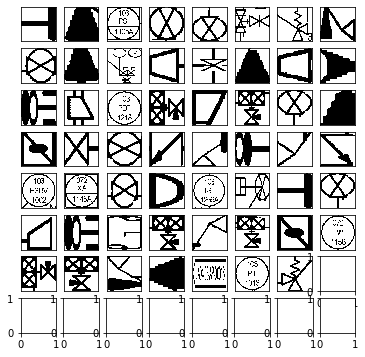

In [7]:
from random import randint
# extract labels (all rows, and last column)
n = df.shape[1] # number of columns 
labels =df['label']
features= df.iloc[:,0:n-1]

# create a grid of 8 by 8
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
fx = features.values # returns numpy array

for i, axi in enumerate(ax.flat):
    # get random index for an image in the dataset
    value = randint(0, df.shape[0])
    axi.imshow(fx[value].reshape(100,100), cmap='gray')
    axi.set(xticks=[], yticks=[])

### Class Distribution

As always, one of the first things we should always check is the class distribution in the dataset. How many symbol of each type is represented in this dataset. To do so, simply use `df['label'].value_counts()`, below is the code that shows the frequency of top-10 most frequent symbols in our dataset


In [ ]:
pd.DataFrame({'Count':df['label'].value_counts()}).head(10)

Another way to check the class-distribution is to use bar plots to show the frequency of various symbols. Knowing class distribution is important, as Machine Learning algorithms tend to be biased toward majority class instances. In other words, if class **A** represents 97% of the data, while class **B** is only **3%** of the data, then it is very likely that your machine learning algorithm will be learn to classify instances belonging to class **A** better than it does with **B**


In [ ]:
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

plt.hist(labels,bins=39)
plt.title('Symbols Distribution')
plt.xlabel('Symbol Class')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.show()

Class-imbalance is an inherent problem in Machine Learning, and there are various ways to handle it. For now, it is just important to know if the dataset you are dealing with is imbalanced or not? And as can be seen from the diagram above, our dataset is hugely imbalanced. Some symbols are dominating the data, while others are underrepresented 

### Missing Values / Outliers 

And, of course  you will need always to check if there is any missing values in your datasets, this can easily be achieved by `df.isnull().sum()`. Notice, that in this dataset we don't have any missing values.  

Another thing, that we should always consider, is to check if we have any outlier values, values that are extremely inconsistent with the rest of the values in our dataset. The easiest way to check for to use `df.describe()`, however, below, I will use this method only on a subset of the dataset, just to show you how to use it. Although, with images, and as can you see below, values range between **0** to **255**, and we often don’t have this problem. 


In [ ]:
# create a small subset and show min, max and other statistical summaries of the data
tmp = df.iloc[:5, list(range(5)) + [-1]]
tmp.describe()

## Preparing the Dataset

### Data Imbalance

First thing we will do for the purpose of this tutorial is to remove the instances (rows) in the dataset that belong to the minority classes (least represented in the dataset). This is not a good approach to handle this problem, and there are various methods handle the class-imbalance. But for this tutorial, we will just get rid of some data. Lets first look at the least-20 represented symbols in the dataset:!

In [ ]:
# least 20 represented categories
df['label'].value_counts().nsmallest(20)

* Now, we need to remove all rows (images) from the dataset that belong to any of the classes above. In other words, remove each row, where its `label` equal to one of the above classes. First, we will create a list to store all names of these classes to be removed:  


In [ ]:
# creat a list of the classes to be removed
to_be_removed =['Barred Tee', 
                'Ultrasonic Flow Meter',
                'Control Valve Angle Choke',
                'Vessel','Deluge',
                'Valve Gate Through Conduit',
                'Line Blindspacer',
                'Control Valve',
                'Temporary Strainer',
                'ESDV Valve Butterfly',
                'Box','ESDV Valve Slab Gate',
                'Rupture Disc',
                'Exit to Atmosphere',
                'Control',
                'Flange + Triangle',
                'Control Valve Globe',
                'Valve Slab Gate',
                'Valve Angle',
                'Valve Globe'
               ]

* Then we updated our dataset by getting rid of these unwanted instances: 

In [ ]:
# keep rows where their label is not in the list above
df = df[~df['label'].isin(to_be_removed)].copy()

# check the new class distribution 
df['label'].value_counts()


Now, you will notice if we check the dataset size, you will see that the number of rows is less that the original number of rows we have above which is **2432**. 

In [ ]:
print(f'Data now has {df.shape[0]} rows')

Lets save our new dataset into a file called symbols.csv, we will store it in the same folder 'Data', this should be outside the current working directory. I set the index to equal false as below, because if I don't do this, pandas will add an extra column (as an index at the beginning of the file):


In [ ]:
df.to_csv('../Data/Symbols.csv',index=None)

### Prepare Data

* Lets first prepare the data as $X$, representing all the input features (pixel values columns), and $y$ to represent the label in the dataset. This is to be consistent with the notation we introduced in week 2. Remember our task is to learn a function $h(x)$ that maps $X$ (the input features) to $y$ the class labels

In [ ]:
# store all rows and columns apart from label in 'X'
# note, X is a data frame with (2224, 10000) shape
X = df.iloc[:,:-1]

# store the labels in y
y = df.iloc[:,-1]

Notice that $X$ will be of type `DataFrame`, for most learning algorithms, it is better to store the input features in a numpy array as follows. This can be done as follows: 

In [ ]:
X = np.array(X)

* Another good practice in Machine Learning is to encode your class labels (categorical variables) into integers, before fitting the model on your data. Recall, our labels are categorical values (i.e. Arrowhead, Valve, Ball Valve, and so on), and we need to encode them into integers. Notice that for RandomForestClassifier, you **don't need this step**, but for other models, this is needed and is considered a best practice in general, so in case you need to use other models, here is one way on how you can encode the labels 'strings' into integer values   !

In [ ]:
# encode y into integers 
from sklearn.preprocessing import LabelEncoder
y_labels = y 
le = LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)
# show few class labels after encoding 
y_encoded[:10]


A good thing about the encoding approach above, is that you can use `inverse_transform` method to transform the encoded integers back into the string’s representation of the labels: 

In [ ]:
inversed_labels = le.inverse_transform(y_encoded)
# show few class labels after encoding 
inversed_labels[:10]

* Once, happy with the state of your dataset, then you need to split the data into training and testing sets. Ideally, the dataset should be split into training, validation, and testing sets. Where you only use the testing set at the very last stages of the development process, but for now, we will use the train/test split only: 

In [ ]:
# test_size default value is 25%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.3,random_state=30)


The ***train_test_split*** function above returns *X_train,X_test,y_train,y_test*. If you are confused about these subsets, then check its types i.e. `type(X_train)` and so on:

### Data Normalisation 

Our dataset represents grey scale images. This means that all values are in the range of 0 to 255. However, for various machine learning algorithms (as discussed in previous weeks), it is better to normalise the data, especially for Neural Networks, which will be discussed in the coming few weeks. Normalising the data is simple and is done by dividing each pixel value by the max value in the corresponding column: 
\begin{equation}
\frac{x-x_{min}}{x_{max}-x_{min}}
\end{equation}
But notice that in our dataset the min value is 0 and the max value across all features (columns) is **255**, therefore, this step can be simply achieved by 

In [ ]:
X_train = X_train/255.0
X_test = X_test / 255.0 

In [ ]:
# Now check few rows and columns of X_train 
# Notice that all values are between zero and one
X_train[:5,:5]

## Build Random Forest

Now, we want to create a Random Forests (RF) model to classify the symbols in our dataset. Notice that the most two important parameters in the model are the number of trees *n_estimators* (default values = 100) and the *max_features* (default value = $\sqrt{n}$) where $n$ is the total number (10,000). *max_features* defines the number of features (columns) to be considered at each node split. In fact this is the most important hyper parameters in RF. You can read more about RandomForestClassifier parameters at [Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), but for now, taking care of these two parameters should be enough

### Create and Train RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

# create an instance of RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,)

# fit the model on training data
rf.fit(X_train,y_train)

### Make Predictions 

Once your training is done -*this may depend on the computing power at your machine, but for this dataset it shouldn’t take much time*-, you can now make some predictions. Recall, that in order to assess how good our model is, we do the predictions on the **testing set**. In other words, we need to test our model on different data, other than the one that was used for training it. An important feature with **sklearn** is that you can also retrieve the actual predictions (i.e. the class of each symbol), as well as the probabilities (i.e. the probability the first image is a valve), which is also very helpful for further analysis of the results: !


In [ ]:
# Predicted classes of the testing set
rf_predictions = rf.predict(X_test)


# get probabilities of predictions
rf_probs = rf.predict_proba(X_test)

# note rf_probs is a 2d numpu array
# show the class probs for the first image (note the output)
rf_probs[:1]

### Results

Lets start by computing the accuracy of the RF model using the *accuracy_score* of Scikit-Learn. Notice however, that accuracy here is not the most important evaluation metric: 

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

accuracy = accuracy_score(y_test, rf_predictions)
print(f'The overall accuracy of RF is {np.round(accuracy*100,2)}%')

Another important evaluation metrics to consider are the confusion matrix, precision, recall, and F1 score. These can also be easily obtained as follows: 

In [ ]:
# print confusion matrix 
print(confusion_matrix(y_test,rf_predictions))



***sklearn.metrics.classification_report*** builds a text report showing the main classification metrics per class label. This is very useful very multi-class problem (like the one we are dealing with). Review the definition of **Precision, recall, and F1-Score**, 



In [ ]:
# classification_report
print(classification_report(y_test,rf_predictions))


### Manual Error Analysis

It is always good to have a closer look at the results. lets first try to compute the accuracy manually instead of using ***sklearn*** as above, this should also show you few more tricks in Python: 


In [ ]:
# store actual class labels and predicted ones in a dataframe
results = pd.DataFrame({'Actual':y_test,'Predicted':rf_predictions})
results.head()

Remember that the accuracy of the model is equal to the number of correctly classified examples, divided by the total number of examples in the dataset. Lets compute ***accuracy*** manually, and see if we get same results as above: 

In [ ]:
accuracy_m = results[results.Actual==results.Predicted].shape[0]/results.shape[0]
print(f'Accuracy of the model is {np.round(accuracy_m*100,2)}%')

Recall, that we have computed also the probabilities that a certain example (row) is of a specific class symbol. We did this above using the code `rf_probs = rf.predict_proba(X_test)[:, 1]`. Lets get these probabilities and store them in a pandas data frame



In [ ]:
# create dataframe with probs, and headers as class names 
tmp = pd.DataFrame(rf.predict_proba(X_test), columns=rf.classes_)
tmp.columns = rf.classes_

# un-comment the line below to show how the probs dataframe look like 
#tmp.head()

Looking at the table above (resulting from `tmp.head()`), you will notice for example that the highest probability in the first row is 0.95, and corresponds to the class label reducer. This simply means that the first instance in the dataset will be classified as a reducer. You can verify this for the first five rows as follows:  



In [ ]:
# get predicted classes for the first five instances in the dataset

for i in range(5):
    # use \ to continue to next line 
    print(f'The predicted class of symbol {i} \
    in the testing set is {rf.predict(X_test[i:i+1])}')

    

Lets now extract from our results dataframe only the incorrectly classified examples. Sometimes it is useful to look at these examples separately: 

In [ ]:
incorrect = results[results.Actual!=results.Predicted]
incorrect.head()

**Task #1:** You may also want to check the probabilities of the incorrectly misclassified examples in the **incorrect** data frame.

### Show some Predictions 

It is always good idea to explore further some of the misclassified examples in the dataset. Below is the code that displays the incorrectly classified symbols in the testing set: 

In [ ]:
# put the testing set in numpy array
tmp = X_test
# create 6 x 6 grid for plots 
fig, ax = plt.subplots(6,6,figsize=(8,8))
for i, axi in enumerate(ax.flat):
    # reshape to 100 x 100 (recall each image is 10,000 pixel values)
    #axi.imshow(tmp[i].reshape(100, 100), cmap='bone')
    # show random set of images every run
    value = randint(0, tmp.shape[0])
    axi.imshow(tmp[value].reshape(100, 100), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(rf_predictions[i])
    
fig.suptitle('Misclassified Instances', size=14);



## Save your Model 

As we did in Week 4, suppose that you are happy with your model’s performance, so now it is  time to save it so that you can re-use it without the need to retrain it from scratch again. Below is the code to save your model: 

In [ ]:
import pickle
# Save to file in the current working directory
pkl_filename = "rf_model.pkl"
# save your model that was created above (lg_model)
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)

* And, you can always load it and re-use it, without the need to retrain it again, as follows:


In [ ]:
# Load from file
with open(pkl_filename, 'rb') as file:
    rf_model = pickle.load(file)
score = rf_model.score(X_test, y_test)


* Here, I will use the model loaded to classify the first symbol in my testing set

In [ ]:
print(f'The the first symbol in the testing set is of type {rf_model.predict(X_test[:1])}')

## Feature Importance 

Two more notes about Random Forest. First, it has a nice feature that allows you to measure the importance of the various input features in your dataset. Below is a simple code that list the features importance’s of the iris dataset (we explored previous weeks) 

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(iris['data'],iris['target'])


In [ ]:
features_importance = []
for name, score in zip(iris['feature_names'],rf.feature_importances_):
    # store in list of dictionaries
    features_importance.append({'Feature':name,'Importance':score})
# show the first few lements

In [ ]:
features_importance[:5]

In [ ]:
# YOU CAN Also sort the list by features importance
import operator
features_importance.sort(key=operator.itemgetter('Importance'))
features_importance

The second note, is that often increasing the number of trees in the ensemble beyond 500 won’t significantly change the model’s performance. Although the max_featues might change the results. You are encouraged to experiment with different values of number of trees and max_featuers. 



## Fund with Pandas (Optional)

The previous section concluded the tutorial, so if you reached this far, congratulations. Below is just few more tricks with pandas, you may find it useful for various tasks. 

The **groupby** is great function in Pandas that allow you to aggregate results in so many ways. Here is a simple quick example. But first, lets do predictions across the whole dataset using the RF model that loaded from a file:



In [ ]:
# make predictions across all the data frame
preds = rf_model.predict(np.array(df.iloc[:,:-1]))

In [ ]:
# create a new data frame using dictionary
results = pd.DataFrame({'Actual':df['label'],'Predicted':preds})
# lets first add the classification results to the a copy of the original dataframe
df_results = pd.concat([df, results], axis=1)

In [ ]:
# show first five rows and last five columns in the dataset we created
df_results.iloc[5:,-5:].head()

In [ ]:
# lets compare predictions against actual class labels
check_predictions = np.where(df_results['Actual'] == df_results['Predicted'], True, False)
# lets add one more column to the above dataframe 
df_results['isCorrect']=check_predictions

# lets now again first five rows and last five columns (notice the difference)
df_results.iloc[5:,-5:].head()


In [ ]:
# group by features (pandas ) only correctly classified examples 
correct_insts = pd.DataFrame(df_results[df_results.isCorrect==True].groupby(['label'])['isCorrect'].count()).reset_index()

# change headers 
correct_insts.columns = ['Symbol','Count']
# show dataframe 
correct_insts

In [ ]:
# lets now groupby only inccorrectly classified examples 

incorrect_insts = pd.DataFrame(df_results[df_results.isCorrect!=True].groupby(['label'])['isCorrect'].count()).reset_index()

# change headers 
incorrect_insts.columns = ['Symbol','Count']
# show dataframe 
incorrect_insts

## Final Word 

You may also want to view the incorrectly classified examples (as images) as we did above with some of the symbols. This should give you more insights, why these instances were incorrectly classified. 

Finally, if you want to use streamlit to run your RF model above, see the ***streamlitApp.py*** on the module’s page
